# 2 Regular Expressions Module

1. Initialize a variable python_mentions with the integer value 0.

1. Create a string — pattern — containing a regular expression pattern that uses a set to match Python or python.

1. Use a loop to iterate over each item in the titles list, and for each item:
    - Use the re.search() function to check whether pattern matches the title.
    - If re.search() returns a match object, increment (add 1 to) the python_mentions variable.

In [1]:
import pandas as pd
import re

hn = pd.read_csv("04_Data_Cleaning/04_2_Advanced_data_cleaning/hacker_news.csv")

titles = hn["title"]
python_mentions = 0
pattern = "[Pp]ython"

for t in titles:
    if re.search(pattern, t):
        python_mentions += 1
        
print(python_mentions)

160


# 3 Counting Matches with pandas Methods

`Series.str.contains()` method can be used to test whether a Series of strings match a particular regex pattern.

Next, we'll create our regex pattern, and use `Series.str.contains()` to compare to each value in our series:

```
pattern = "[Bb]lue"
pattern_contained = eg_series.str.contains(pattern)
```

The result is a boolean mask: a series of **True** / **False** values.

One of the neat things about boolean masks is that you can use the `Series.sum()` method to sum all the values in the boolean mask, with each True value counting as 1, and each False as 0. This means that we can easily count the number of values in the original series that matched our pattern.

If we wanted, we could use method chaining to do the whole operation on one line:

```
pattern_count = eg_series.str.contains(pattern).sum()
print(pattern_count)
```




## Instructions

1. Assign the title column from the hn dataframe to the variable titles.

1. Use `Series.str.contains()` and `Series.sum()` with the provided regex pattern to count how many Hacker News titles contain **Python** or **python**. Assign the result to `python_mentions`.


In [4]:
pattern = '[Pp]ython'

titles = hn["title"]

python_mentions = titles.str.contains(pattern).sum()
print(python_mentions)

160


# 4 Using Regular Expressions to Select Data

On the previous two screens, we used regular expressions to count how many titles contain Python or python. What if we wanted to **view** those titles?

In that case, we can use the boolean array returned by `Series.str.contains()` to select just those rows from our series.

``` titles = hn['title']

py_titles_bool = titles.str.contains("[Pp]ython")
print(py_titles_bool.head())
```

```0    False
1    False
2    False
3    False
4    False
Name: title, dtype: bool
```

Then, we can use that boolean array to select just the matching rows:


```
py_titles = titles[py_titles_bool]
print(py_titles.head())

```

We can also do it in a streamlined, single line of code:

```
py_titles = titles[titles.str.contains("[Pp]ython")]
print(py_titles.head())
```

## Instructions

Use `Series.str.contains()` to create a series of the values from titles that contain **Ruby** or **ruby**. Assign the result to `ruby_titles`.

In [3]:
titles = hn['title']
pattern = "[Rr]uby"

ruby_titles = titles[titles.str.contains(pattern)]
print(ruby_titles)

190                     Ruby on Google AppEngine Goes Beta
484           Related: Pure Ruby Relational Algebra Engine
1388     Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949     Rewriting a Ruby C Extension in Rust: How a Na...
2022     Show HN: CrashBreak  Reproduce exceptions as f...
2163                   Ruby 2.3 Is Only 4% Faster than 2.2
2306     Websocket Shootout: Clojure, C++, Elixir, Go, ...
2620                       Why Startups Use Ruby on Rails?
2645     Ask HN: Should I continue working a Ruby gem f...
3290     Ruby on Rails and the importance of being stup...
3749     Telegram.org Bot Platform Webhooks Server, for...
3874     Warp Directory (wd) unix command line tool for...
4026     OS X 10.11 Ruby / Rails users can install ther...
4163     Charles Nutter of JRuby Banned by Rubinius for...
4602     Quiz: Ruby or Rails? Matz and DHH were not abl...
5832     Show HN: An experimental Python to C#/Go/Ruby/...
6180     Shrine  A new solution for handling file uploa.

# 5 Quantifiers

We learned that we could use braces ({}) to specify that a character repeats in our regular expression. For instance, if we wanted to write a pattern that matches the numbers in text from `1000` to `2999` we could write the regular expression below:

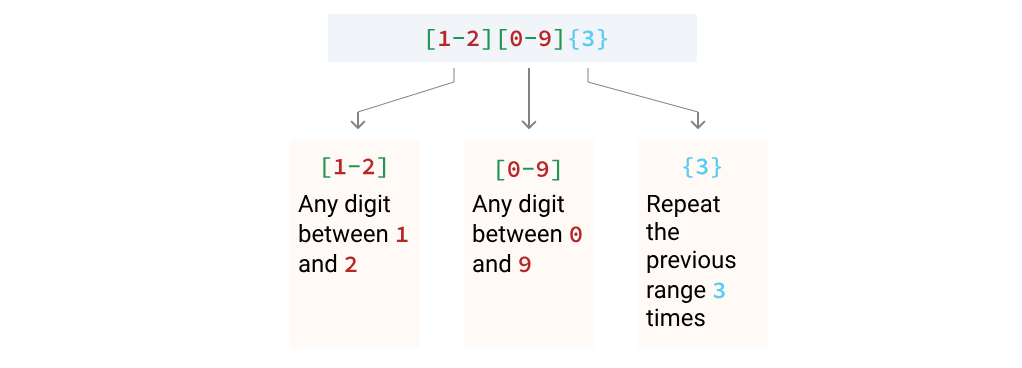

**Quantifiers** specify how many of the previous character our pattern requires, which can help us when we want to match substrings of specific lengths. As an example, we might want to match both `e-mail` and `email`. To do this, we would want to specify to match `-` either zero or one times.

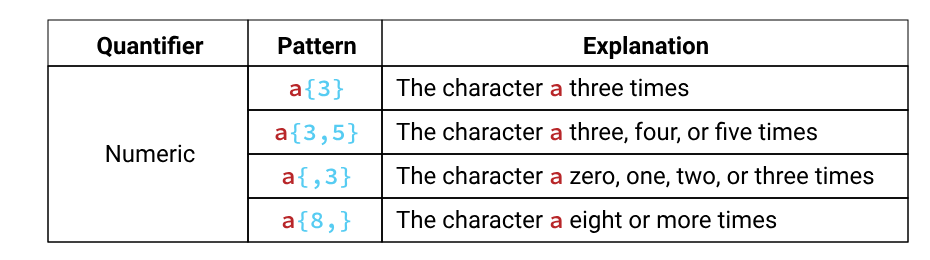

You might notice that the last two examples above omit the **first** and **last** character as wildcards, in the same way that we can omit the first or last indicies when slicing lists.

In addition to **numeric quantifiers**, there are single characters in regex that specify some common quantifiers that you're likely to use. A summary of them is below.

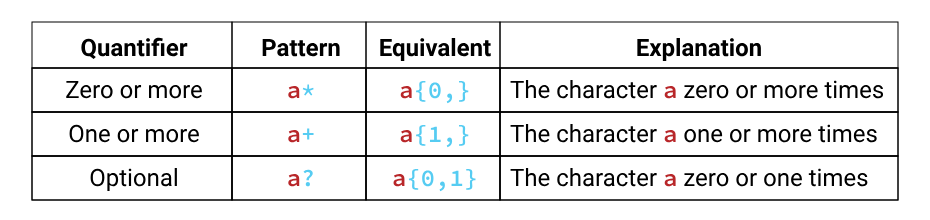





## Instructions

1. Use a regular expression and `Series.str.contains()` to create a boolean mask that matches items from titles containing `email` or `e-mail`. Assign the result to `email_bool`.

1. Use `email_bool` to count the number of titles that matched the regular expression. Assign the result to `email_count`.

1. Use `email_bool` to select only the items from `titles` that matched the regular expression. Assign the result to `email_titles`.

In [5]:
# The `titles` variable is available from 
# the previous screens

pattern = "e-?mail" #e-mail or email

#find email boolean mask
email_bool =  titles.str.contains(pattern)

#count email titles
email_count = email_bool.sum()

# Return the specified row in title
email_titles =  titles[titles.str.contains(pattern)]

# 6 Character Classes

Some stories submitted to Hacker News include a topic tag in brackets, like `[pdf]`. In this screen, our task is going to be to find how many titles in our dataset have tags.

Our first inclination may be to create the regex `[pdf]`. Unfortunately, the brackets would be interpreted as a set, so our pattern would match the single characters `p`, `d`, or `f`.

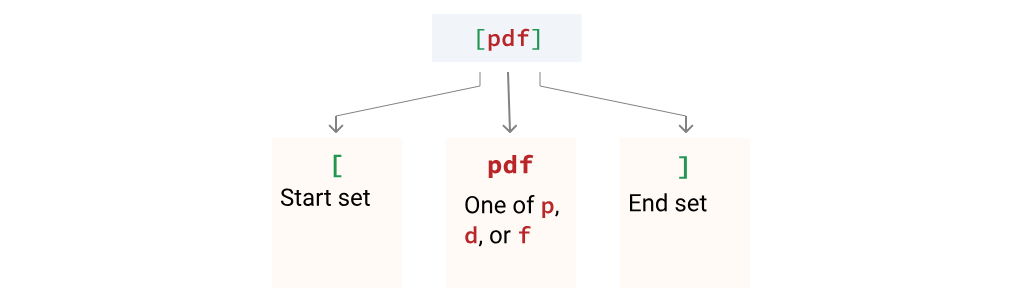

To match the substring `"[pdf]"`, we can use backslashes to escape both the open and closing brackets: `\[pdf\]`.

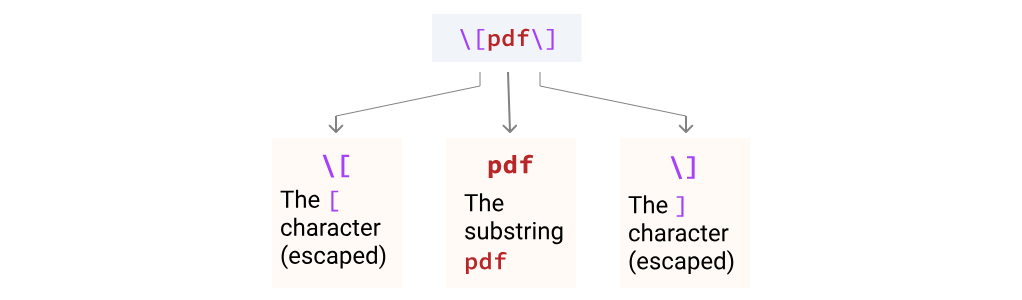

To match unknown characters using regular expressions, we use **character classes**. Character classes allow us to match certain groups of characters. We've actually seen two examples of character classes already:

1. The set notation using brackets to match any of a number of characters.

1. The range notation, which we used to match ranges of digits (like `[0-9]`).

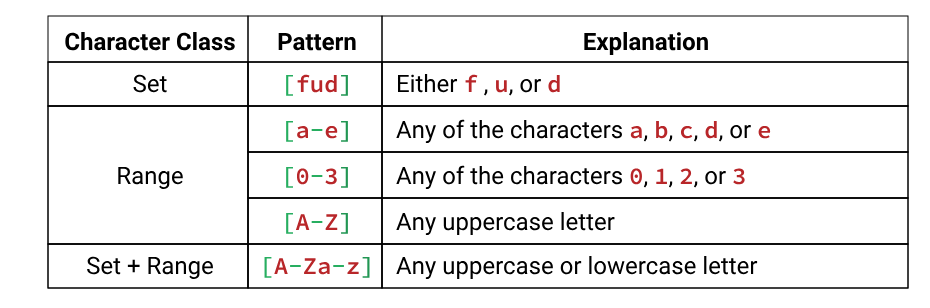

Just like with quantifiers, there are some other common character classes which we'll use a lot.

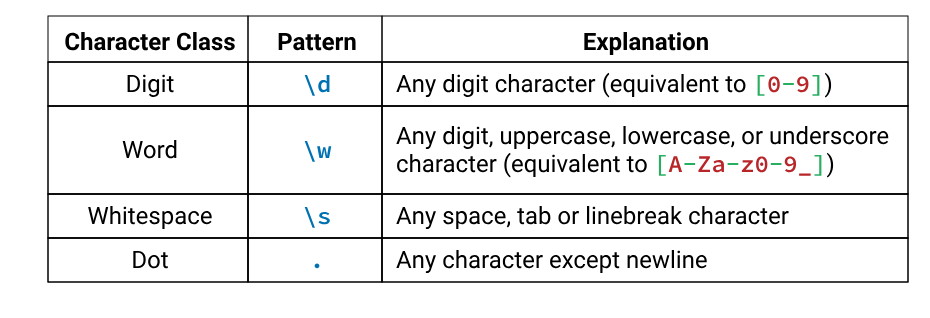

The one that we'll be using to match characters in tags is `\w`, which represents any number or letter. Each character class represents a single character, so to match multiple characters (e.g. words like `video` and `pdf`), we'll need to combine them with quantifiers.

In order to match word characters between our brackets, we can combine the word character class (`\w`) with the 'one or more' quantifier `(+)`,  giving us a combined pattern of `\w+`.

This will match sequences like `pdf`, `video`, `Python`, and `2018` but won't match a sequence containing a space or punctuation character like `PHP-DEV` or `XKCD Flowchart`. If we wanted to match those tags as well, we could use `.+`; however, in this case, we're just interested in single-word tags without special characters.

Let's quickly recap the concepts we learned in this screen:

* We can use a backslash to escape characters that have special meaning in regular expressions (e.g. `\[{ } will match an open bracket character).

* Character classes let us match certain groups of characters (e.g. `\w` will match any word character).

* Character classes can be combined with quantifiers when we want to match different numbers of characters.


## Instructions

1. Write a regular expression, assigning it as a string to the variable pattern. The regular expression should match, in order:

        1. A single open bracket character.

        2. One or more word characters.

        3. A single close bracket character.

1. Use the regular expression to select only items from titles that match. Assign the result to the variable `tag_titles`.

1. Count how many matching titles there are. Assign the result to `tag_count`.




In [ ]:
#A single open bracket character. - \[
#One or more word characters. - \w+
#A single close bracket character.

pattern = "\[\w+\]"

#find pattern boolean mask
tag_titles =  titles[titles.str.contains(pattern)]

#count matched  titles
tag_count = tag_titles.shape[0]



# 7 Accessing the Matching Text with Capture Groups

In Python, a backslash followed by certain characters represents an escape sequence — like the `\n` sequence — represents a new line. These escape sequences can result in unintended consequences for our regular expressions. Let's take a look at a string containing the substring `\b`:

```

print('hello\b world')
hell world
```

instead we use raw strings, which we denote by prefixing our string with the `r` character. Let's take a look at the code from above with a raw string:

```
print(r'hello\b world')
hello\b world
```

In the previous screen, we were able to calculate that **444 of the 20,100** Hacker News stories in our dataset contain tags. What if we wanted to find out what the text of these tags were, and how many of each are in the dataset?

In order to do this, we'll need to use **capture groups**. Capture groups allow us to specify one or more groups within our match that we can access separately.

We specify capture groups using **parentheses**. Let's add an open and close parentheses to the pattern we wrote in the previous screen, and break down how each character in our regular expression works:

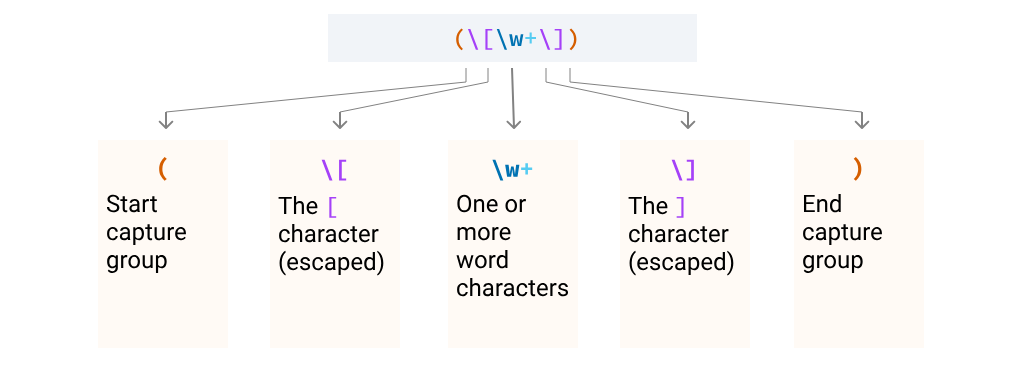

We use the `Series.str.extract()` method to extract the match within our parentheses:

```ruby
    pattern = r"(\[\w+\])"
    tag_5_matches = tag_5.str.extract(pattern)
    print(tag_5_matches)
```

```
    67        [pdf]
    101    [German]
    160       [pdf]
    163       [pdf]
    196      [Beta]
    Name: title, dtype: object

```

We can move our parentheses inside the brackets to get just the text: we specify ``expand=False`` with the Series.str.extract() method to return a series.

```r
pattern = r"\[(\w+)\]"
tag_5_matches = tag_5.str.extract(pattern, expand=False)
print(tag_5_matches)
```

## Instructions

Let's use this technique to extract all of the tags from the Hacker News titles and build a frequency table of those tags.

1. Create a capture group inside the brackets.

1. Use `Series.str.extract()` and `Series.value_counts()` with the modified regex pattern to produce a frequency table of all the tags in the titles series. Assign the frequency table to `tag_freq`.

In [ ]:
pattern = r"\[(\w+)\]"
    
tag_titles = titles.str.extract(pattern,expand=False)

tag_freq = tag_titles.value_counts()
print(tag_freq)

# 8 Negative Character Classes

 In reality, regular expressions are often complex. When creating complex regular expressions, you often need to work iteratively so you can find "bad" instances that match your pattern and then exclude them.

 In order to work faster as you build your regular expression, it can be helpful to create a function that returns the first few matching strings:

 ```python 
 def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

```

Another useful approach is to use an online tool like [RegExr](https://regexr.com/) that allows you to build regular expressions and includes syntax highlighting, instant matches, and regex syntax reference.

**Negative character classes** are character classes that match every character except a character class. Let's look at a table of the common negative character classes:

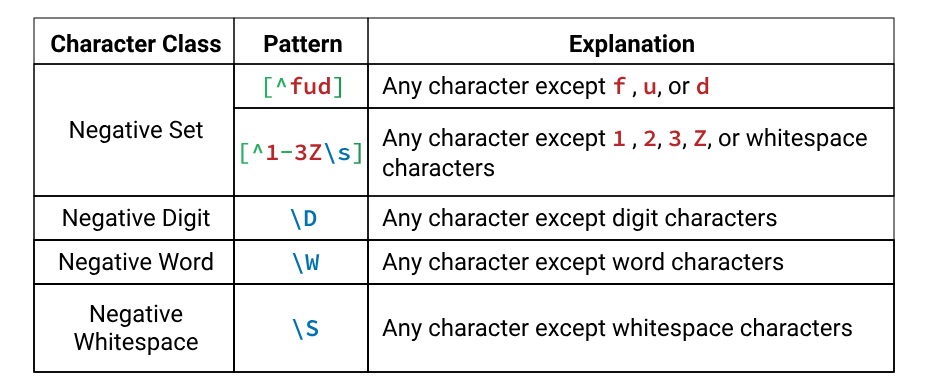



## Instructions

1.Write a regular expression that will match titles containing Java.

* Use the ``first_10_matches()`` function to return the first ten matches. You can also use a site like RegExr to build your regular expression.

* The regex should match whether or not the first character is capitalized.
 
* The regex shouldn't match where '**Java**' is followed by the letter 'S' or 's', or when 'Java' appears at the end of the title, except when the string contains both 'Java' and 'JavaScript' in the title. In this case, the `contains()` function will always recognize the combined pattern as a match, even if the pattern for 'Java' followed by 'S' or 's' fails."

1. Select the first 10 rows from titles that match the regular expression using the first_10_matches function. Assign the result to `java_titles`

In [5]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

#Match with first character captalized or not [Jj]
#Not match JavaSscript [^Ss]
pattern = r"[Jj]ava[^Ss]"

java_titles = first_10_matches(pattern)


# 10 Word Boundaries

While the negative set was effective in removing any bad matches that mention **JavaScript**, it also had the side-effect of removing any titles where Java occurs at the **end** of the string, like this title:

``Pippo  Web framework in Java`` 

This is because the negative set [^Ss] must match **one** character. Instances at the **end** of a string aren't followed by any characters, so there is no match.

A different approach to take in cases like these is to use the **word boundary anchor**, specified using the syntax `\b`. A word boundary matches the position between a word character and a non-word character, or a word character and the start/end of a string.

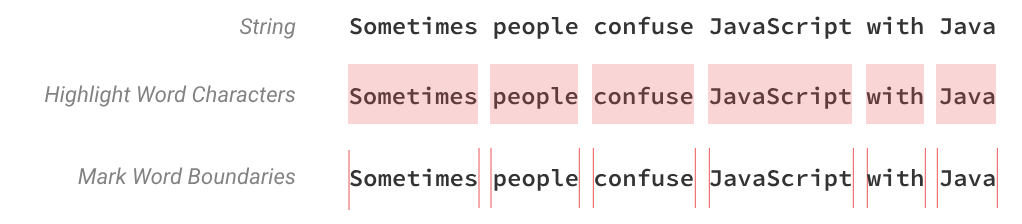



In [6]:
string = "Sometimes people confuse JavaScript with Java"
pattern_1 = r"Java[^S]"

m1 = re.search(pattern_1, string)
print(m1)

None


The regular expression returns `None`, because there is no substring that contains `Java` followed by a character that isn't `S`.

Let's instead use word boundaries in our regular expression:

In [7]:
pattern_2 = r"\bJava\b"

m2 = re.search(pattern_2, string)
print(m2)

<re.Match object; span=(41, 45), match='Java'>


With the word boundary, our pattern matches the `Java` at the **end** of the string.

## Instructions

1. Write a regular expression that will match titles containing Java.

    * You might like to use the `first_10_matches()` function or a site like RegExr to build your regular expression.
    
    * The regex should match whether or not the first character is capitalized.
    
    * The regex should match only where 'Java' is preceded and followed by a word boundary.

        * Note that in cases where our string contains both 'Java' and 'JavaScript' in the title, the `contains()` function will always recognize the combined pattern as a match, even if the pattern for 'Java' followed by 'S' or 's' fails."

        
1. Select from `titles` only the items that match the regular expression. Assign the result to `java_titles`.

In [9]:
#Match with first character captalized or not [Jj]
#Not match in the begining or at the end \b
pattern = r"\b[Jj]ava\b"

java_titles = titles[titles.str.contains(pattern)]


# 10 Matching at the Start and End of Strings

There are often scenarios where we want to specifically match a pattern at the **start** and **end** of strings.

we learned that the **word boundary anchor** matches the space between a word character and a non-word character. More generally in regular expressions, an anchor matches something that isn't a character, as opposed to character classes which match specific characters.

Other than the word boundary anchor, the other two most common anchors are the **beginning anchor** and the **end anchor**, which represent the start and the end of the string.

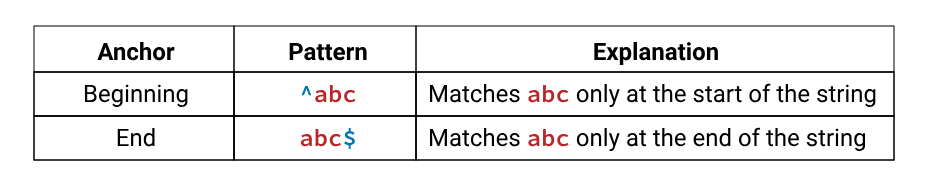

Note that the `^` character is used both as a beginning anchor and to indicate a negative set, depending on whether the character preceding it is a `[` or not.

## Example

Let's start with a few test cases that all contain the substring `Red` at different parts of the string, as well as a test function:

In [10]:
test_cases = pd.Series([
    "Red Nose Day is a well-known fundraising event",
    "My favorite color is Red",
    "My Red Car was purchased three years ago"
])
print(test_cases)

0    Red Nose Day is a well-known fundraising event
1                          My favorite color is Red
2          My Red Car was purchased three years ago
dtype: object


If we want to match the word `Red` only if it occurs at the **start** of the string, we add the **beginning** anchor to the start of our regular expression:

In [11]:
test_cases.str.contains(r"^Red")

0     True
1    False
2    False
dtype: bool

If we want to match the word `Red` only if it occurs at the **end** of the string, we add the end anchor to the **end** of our regular expression:

In [12]:
test_cases.str.contains(r"Red$")

0    False
1     True
2    False
dtype: bool

## Instructions

Let's use the **beginning** and **end** anchors to count how many titles have tags at the start versus the end of the story title in our Hacker News dataset.

1. Count the number of times that a tag (e.g. `[pdf]` or `[video]`) occurs at the **start** of a title in titles. Assign the result to `beginning_count`.

1. Count the number of times that a tag (e.g. `[pdf]` or `[video]`) occurs at the **end** of a title in titles. Assign the result to **ending_count**.



In [ ]:
start_tag = r"^\[\w+\]" #starts with [ . at least onde word (w) and finishing with ]
end_tag = r"\[\w+\]$"


beginning_count = titles.str.contains(start_tag).sum()
ending_count = titles.str.contains(end_tag).sum()

## 11 Challenge: Using Flags to Modify Regex Patterns

Up until now, we've been using sets like [Pp] to match different capitalizations in our regular expressions. This strategy works well when there is only one character that has capitalization, but becomes cumbersome when we need to cater for multiple instances.

Within the titles, there are many different formatting styles used to represent the word "email." Here is a list of the variations:

email
Email
e Mail
e mail
E-mail
e-mail
eMail
E-Mail
EMAIL
emails
Emails
E-Mails

 we can use **flags** to specify that our regular expression should ignore case.

Both `re.search()` and the pandas regular expression methods accept an optional `flags` argument. This argument accepts one or more flags, which are special variables in the re module that modify the behavior of the regex interpreter.

A list of all available flags is in the documentation, but by far the most common and the most useful is the `re.IGNORECASE` flag, which is also available using the alias `re.I` for convenience.

When you use this flag, **all** uppercase letters will match their lowercase equivalents and vice versa. Let's look at an example **without** using the flag:

In [ ]:
email_tests = pd.Series(['email', 'Email', 'eMail', 'EMAIL'])
email_tests.str.contains(r"email")

Now using the flag `re.I` 

In [ ]:
import re
email_tests.str.contains(r"email",flags=re.I)

## Instructions

1. Write a regular expression that will match all variations of email included in the starter code.

1. Write your regular expression in a way that will be compatible with the ignorecase flag, and should not match the word "emailing" or any other words that contain "email" as a substring.

    * As you build your regular expression, you might like to use `Series.str.contains()` like we did in the examples earlier in this screen.
    
1. Once your regular expression matches all the test cases, use it to count the number of mentions of email in titles in the dataset. Assign the result to `email_mentions`.

In [ ]:
import re
email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail','e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails'])

pattern = r"\be.?mails?\b"

#test usigin e-mail tests
email_mentions = email_tests.str.contains(pattern,flags=re.I).sum()

#using titles
email_mentions = titles.str.contains(pattern,flags=re.I).sum()

